# Analysis of Mobile Price Data

In this notebook, I will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. The main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset) and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

This notebook's goal is to build and evaluate predictive models for 'price range' from other available features. More specifically, here's the workflow of this notebook:

1. **Data preparation and exploration**: This step is to check null values, outliers, and handle them to clean the data.

2. **Study the correlation** between 'price range' with other features: This step is to figure out which variables are helpful for predicting the price range.

3. **Split the dataset** (Training set : Test set = 8:2).

4. **Train a Logistic Regression model** to predict 'price range' based on the selected features. **Calculate the accuracy** of the model.

5. **Improve baseline by using KNN** to predict 'price range' based on the selected features. **Calculate the accuracy** of the model. 

6. **Tune the hyper-parameter K** in KNN by using cross validation, ***visualize the results***, and ***explain*** how K influences the prediction performance.

### 1. Explore & Clean the data

**Import libraries**

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### 1.1 Brief information about the dataset

In [61]:
# Read file
mobile_price = pd.read_csv("Mobile_Price_Data.csv")
mobile_price.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [62]:
mobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

**Information from the output:**

* There are missing values in several columns: 'int_memory', 'm_dep', 'px_width', 'ram', 'three_g'
* Data type features: numeric.

#### 1.2. Impute missing values

In [63]:
# Impute missing values using median (for numeric variable)

mobile_price['int_memory'].fillna(mobile_price['int_memory'].median(skipna = True, numeric_only = True), inplace = True)
mobile_price['m_dep'].fillna(mobile_price['m_dep'].median(skipna = True, numeric_only = True), inplace = True)
mobile_price['px_width'].fillna(mobile_price['px_width'].median(skipna = True, numeric_only = True), inplace = True)
mobile_price['ram'].fillna(mobile_price['ram'].median(skipna = True, numeric_only = True), inplace = True)

# Impute missing values using mode (for binary variable)
#print(mobile_price['three_g'].mode())
mobile_price['three_g'].fillna(value = '1.0', inplace = True)

print(mobile_price.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


#### 1.3. Detect and drop outliers

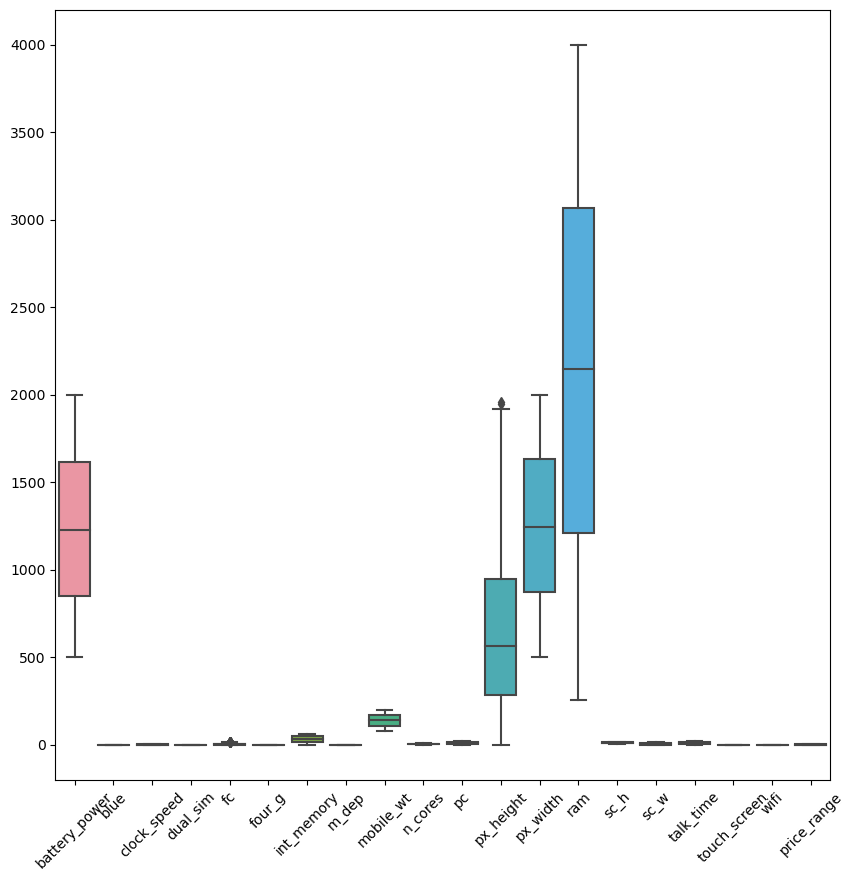

In [64]:
total_cols = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

plt.figure(figsize=(10,10))
sns.boxplot(data = mobile_price[total_cols])
plt.xticks(rotation = 45)
plt.show()


**Information observed from the chart**
* There are outliers detected in columns: 'fc' and 'px_heigh'

In [65]:
# Define outlier of "fc"
q1_fc = mobile_price['fc'].quantile(0.25)
q3_fc = mobile_price['fc'].quantile(0.75)

iqr_fc = q3_fc - q1_fc

lower_bound_fc = q1_fc - 1.5 * iqr_fc
upper_bound_fc = q3_fc + 1.5 * iqr_fc
print("fc:", lower_bound_fc, upper_bound_fc)

# Define outlier of "px_height"
q1_px = mobile_price['px_height'].quantile(0.25)
q3_px = mobile_price['px_height'].quantile(0.75)

iqr_px = q3_px - q1_px

lower_bound_px = q1_px - 1.5 * iqr_px
upper_bound_px = q3_px + 1.5 * iqr_px
print("px:", lower_bound_px, upper_bound_px)

fc: -8.0 16.0
px: -714.0 1944.0


<class 'pandas.core.frame.DataFrame'>
Index: 1980 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1980 non-null   int64  
 1   blue           1980 non-null   int64  
 2   clock_speed    1980 non-null   float64
 3   dual_sim       1980 non-null   int64  
 4   fc             1980 non-null   int64  
 5   four_g         1980 non-null   int64  
 6   int_memory     1980 non-null   float64
 7   m_dep          1980 non-null   float64
 8   mobile_wt      1980 non-null   int64  
 9   n_cores        1980 non-null   int64  
 10  pc             1980 non-null   int64  
 11  px_height      1980 non-null   int64  
 12  px_width       1980 non-null   float64
 13  ram            1980 non-null   float64
 14  sc_h           1980 non-null   int64  
 15  sc_w           1980 non-null   int64  
 16  talk_time      1980 non-null   int64  
 17  three_g        1980 non-null   object 
 18  touch_screen 

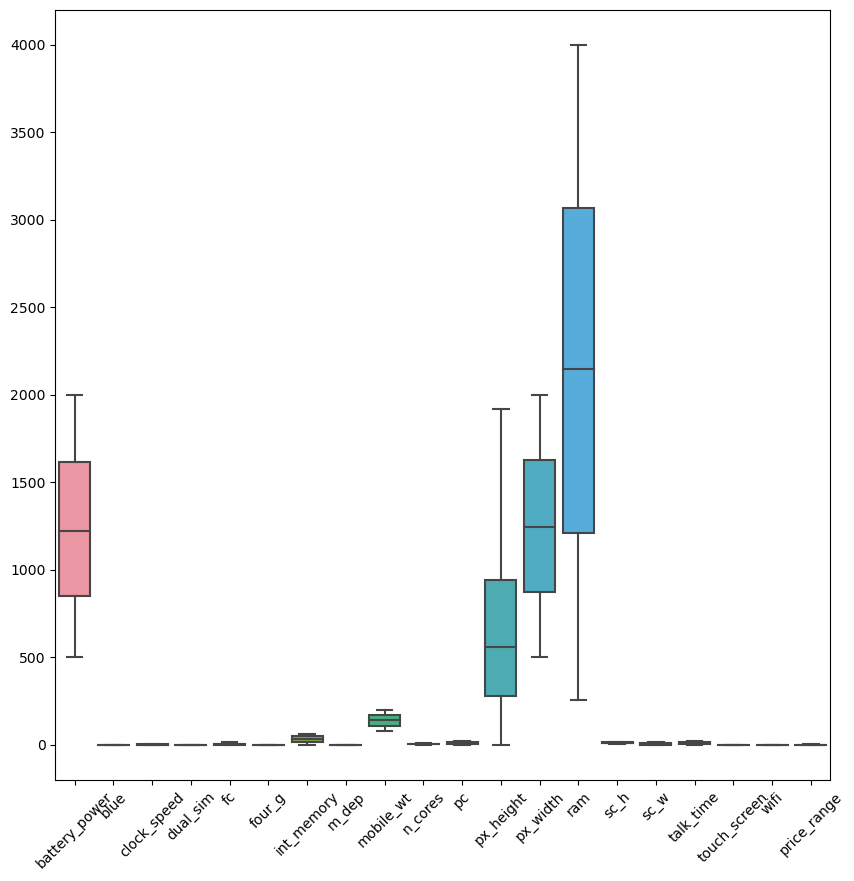

In [66]:
mobile_price_after = mobile_price[mobile_price["fc"]<= 16]
mobile_price_after = mobile_price_after[mobile_price_after["px_height"] <= 1944]

print(mobile_price_after.info())
# Boxplot after filtering outliers
total_cols = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

# After removing outliers
plt.figure(figsize=(10,10))
sns.boxplot(data = mobile_price_after[total_cols])
plt.xticks(rotation = 45)
plt.show()

### 2. Study the correlation and Select variables

**Work with correlation between 'price range' and other features** 

In [67]:
correlation_pricerange = mobile_price_after.corr()['price_range'].sort_values(ascending=False)
correlation_pricerange

price_range      1.000000
ram              0.917002
battery_power    0.200763
px_width         0.164980
px_height        0.144277
int_memory       0.043188
sc_w             0.038076
pc               0.033871
sc_h             0.025641
three_g          0.025462
fc               0.021120
talk_time        0.020582
dual_sim         0.019016
wifi             0.017192
four_g           0.015906
blue             0.015798
n_cores          0.008307
m_dep           -0.001631
clock_speed     -0.006120
mobile_wt       -0.031628
touch_screen    -0.033888
Name: price_range, dtype: float64

<Axes: >

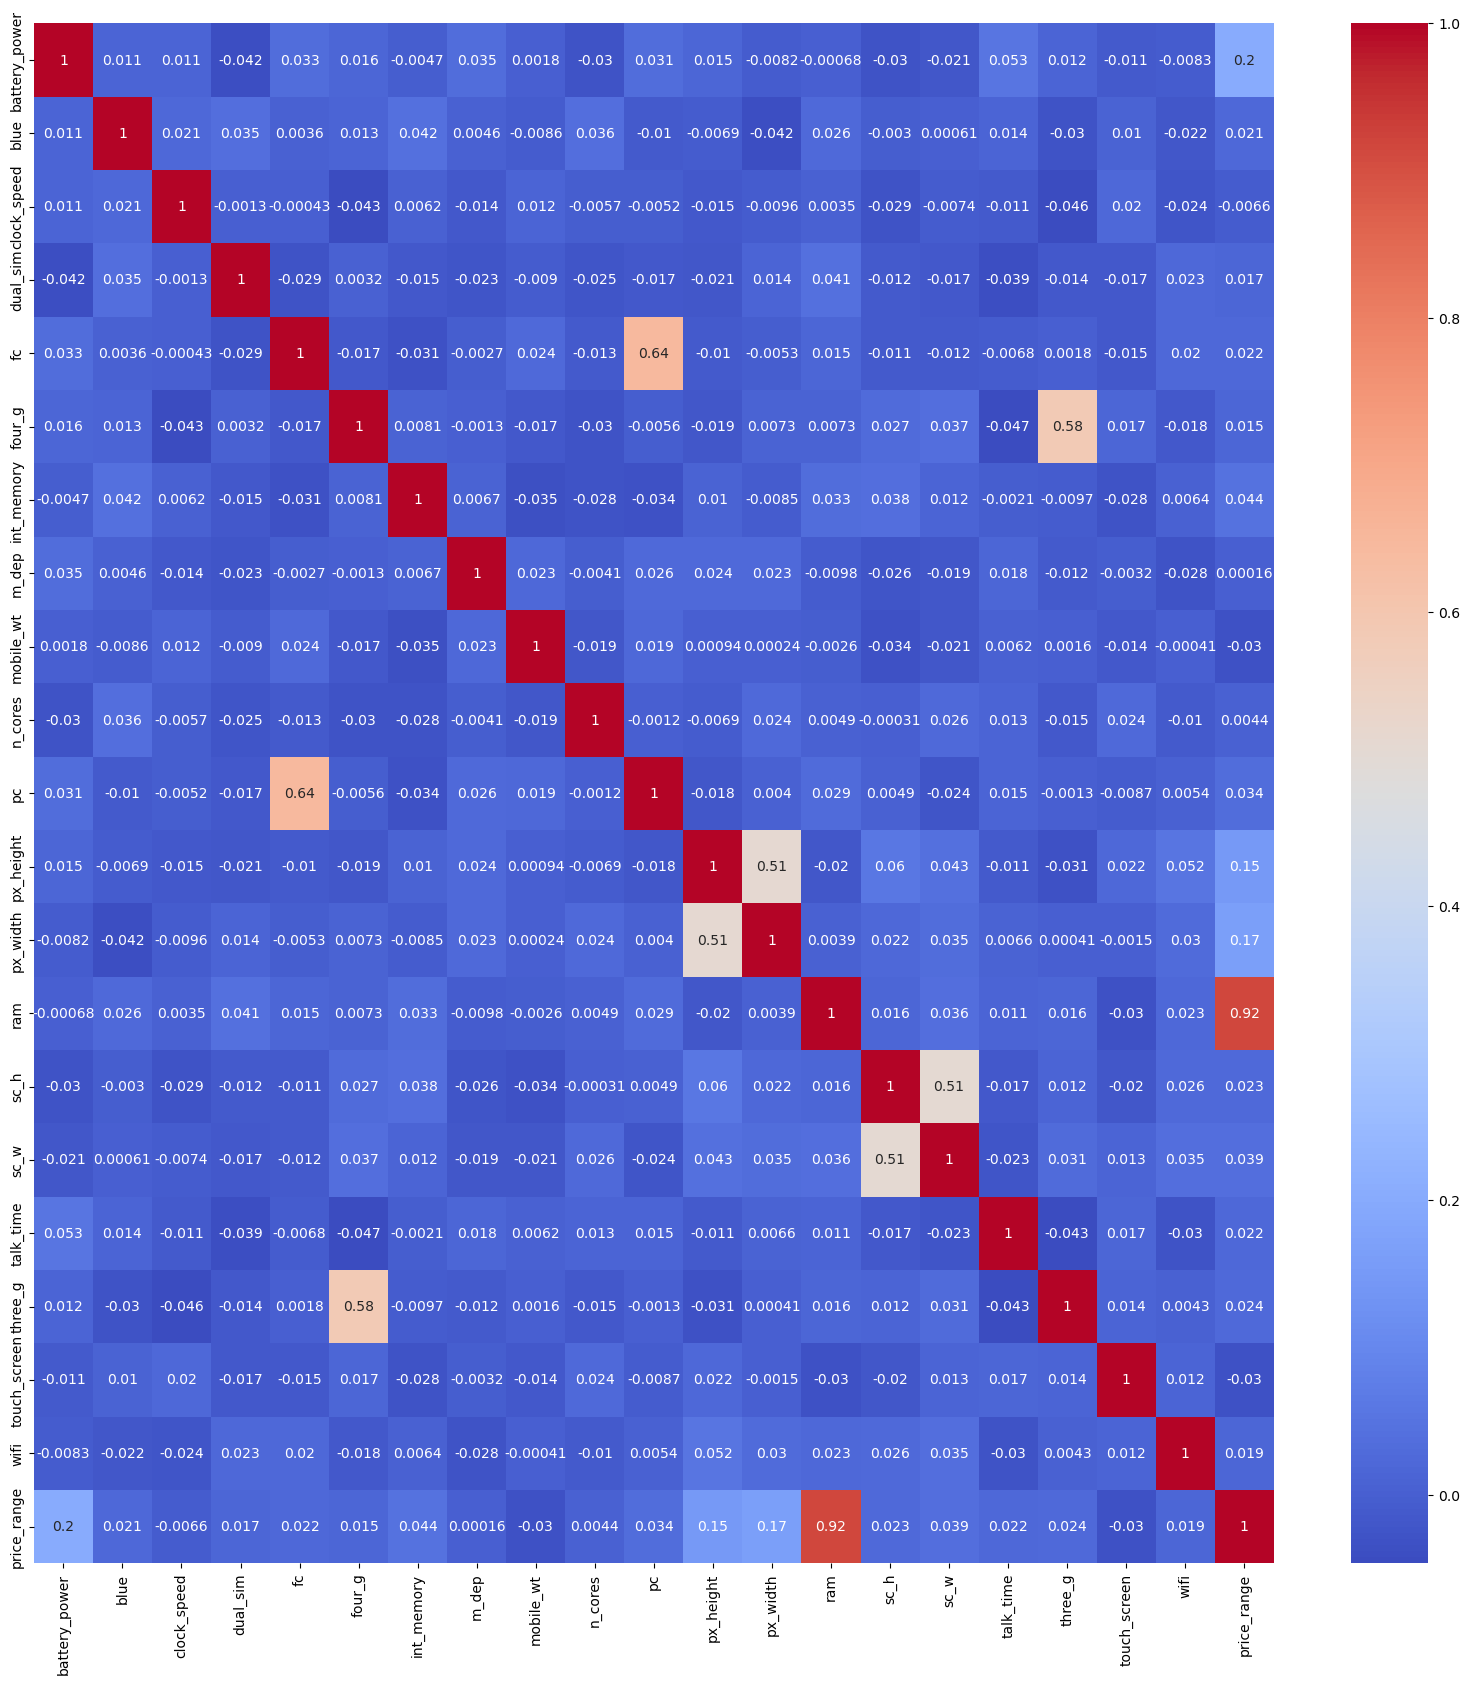

In [68]:
plt.figure(figsize = (20, 20))
sns.heatmap(mobile_price.corr(), annot = True, cmap = 'coolwarm')

Based on the information above, we use "ram", "battery_power", "px_width", and "px_height" to train and test the model since the absolute correlations between these figures and "price range" are noticable, which shows that if these figures changed, price range would be affected.

### 3. Split the dataset

In [69]:
train_data, test_data = train_test_split(mobile_price_after, test_size = 0.2, random_state = 42)

print("Shapes of training and testing sets: ")
print("- Train: ", train_data.shape)
print("- Test: ", test_data.shape)

X_train = train_data[['ram', 'battery_power', 'px_width', 'px_height']]
y_train = train_data['price_range']

X_test = test_data[['ram', 'battery_power', 'px_width', 'px_height']]
y_test = test_data['price_range']


Shapes of training and testing sets: 
- Train:  (1584, 21)
- Test:  (396, 21)


### 4. Train and evaluate a logistic regression model

In [70]:
# Train a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [71]:
# Evaluate model's accuracy
train_accuracy = accuracy_score(y_train, logistic_model.predict(X_train))
test_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))

print("Logistic Regression train accuracy:", train_accuracy)
print("Logistic Regression test accuracy:", test_accuracy)

Logistic Regression train accuracy: 0.9595959595959596
Logistic Regression test accuracy: 0.9621212121212122


In [72]:
# Prediction on both training and test sets
y_predict_train = logistic_model.predict(X_train)
y_predict_test = logistic_model.predict(X_test)

# Calculating MSE on both training and test sets
mse_train = mean_squared_error(y_train, y_predict_train)
mse_test = mean_squared_error(y_test, y_predict_test)

# R Squared on both training and test sets
r2_train = r2_score(y_train, y_predict_train)
r2_test = r2_score(y_test, y_predict_test)

# Root MSE on both training and test sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Display the results for training
print("Training set: ")
print("- MSE: ", mse_train)
print("- R Squared: ", r2_train)
print("- Root MSE: ", rmse_train)

# Display the results for testing
print("Test set: ")
print("- MSE: ", mse_test)
print("- R Squared: ", r2_test)
print("- Root MSE: ", rmse_test)

Training set: 
- MSE:  0.04040404040404041
- R Squared:  0.9671456947268023
- Root MSE:  0.20100756305184242
Test set: 
- MSE:  0.03787878787878788
- R Squared:  0.9714218358343236
- Root MSE:  0.19462473604038075


***Explain model and evaluate the performance***

The accuracy of this model for both training and test sets are high, which are nearly and above 96%, respectively, which shows that this model performs well on predicting price range. 

MSE (Mean squared error) of this model for both training and test sets are significantly low, at around 0.04 and 0.038, respectively. Moreover, R Squared are high in both training and test sets with R Squared for training set at around 0.97 and for test set at around 0.97.

All these factors above along with using the most correlated data in this model indicate that this model performs well while the predicted price range could be nearly identical with the actual value.

### 5. Train a KNN model

In [73]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier

X_train_knn = train_data[['ram', 'battery_power', 'px_width', 'px_height']]
y_train_knn = train_data['price_range']

X_test_knn = test_data[['ram', 'battery_power', 'px_width', 'px_height']]
y_test_knn = test_data['price_range']

In [74]:
# Train and fit a KNN model
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
# Evaluate model's accuracy
train_accuracy_knn = accuracy_score(y_train, knn_model.predict(X_train_knn))
test_accuracy_knn = accuracy_score(y_test, knn_model.predict(X_test_knn))

print("KNN Train Accuracy:", train_accuracy_knn)
print("KNN Test Accuracy:", test_accuracy_knn)

KNN Train Accuracy: 0.9438131313131313
KNN Test Accuracy: 0.9368686868686869


### 6. Tune the hyper-parameter K

In [76]:
# Import libraries and set up
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 21)} # Range of K values
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring = 'accuracy') # Set up a grid search

In [77]:
# Fit the GridSearch CV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [78]:
# Find the best K value and best accuracy
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print("Best K value:", best_k)
print("Best accuracy:", best_accuracy)

Best K value: 13
Best accuracy: 0.9305654274647607


**Visualise the results**

In [79]:
# Accuracy scores for all K values
cv_results = grid_search.cv_results_
mean_scores = cv_results['mean_test_score']

# Denote K values to visualise
k_values = range(1,21)

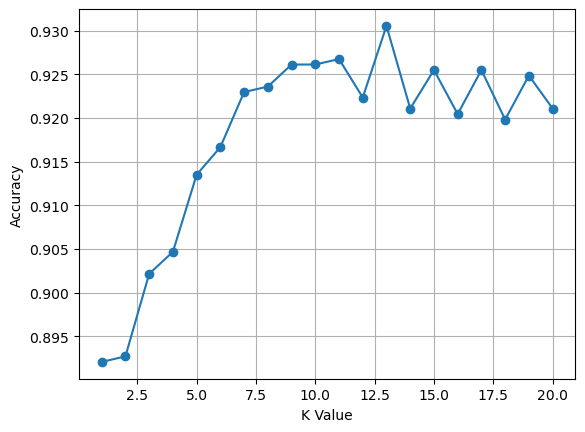

In [80]:
# Visualise the results using line 
plt.plot(k_values, mean_scores, marker ='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

***Explain how K influences the prediction performance***

K is an important factor that could impact the model's prediction performance. 

A very low K value leads to the problem that the model would only predict the class of that single neighbor. This would lead to an inaccurate prediction for unobserved data. Therefore, through the visualisation above, we can see that the accuracy at lower K is quite small compared to others.

A high K value on the other hand leads to the problem that the model considers too many neighbors for prediction. Through the visualisation, when K value keeps increasing, it might affect the accuracy, which shows that increasing does not improve performance. 

Therefore, in order to have the most accurate predictions, we need to find the optimal K by using hyper-parameter tuning and visualisation.
